In [12]:
import importlib
from __imports__ import *
import data, LSTM_returns, optimization

SOL_df = data.load_asset('SOLUSDT')
SOL_df = data.subset(SOL_df, start=pd.Timestamp('2024-01-01 08:00:00'), end=pd.Timestamp('2026-01-01'))
data.report_and_print_gaps(SOL_df)

SOL_df = data.add_returns(SOL_df)
print(SOL_df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Return', 'Return_Target'],
      dtype='object')


In [13]:
# normalize all features but not targets
Fbutnt_df = SOL_df.copy()

numerical_columns = categorical_columns = "all"
exclude_columns = ['Return_Target']
Fbutnt_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Return']
Fbutnt_df, Fbutnt_columns = data.normalize_data(Fbutnt_df, exclude_columns=exclude_columns)

# fewer features (OHLC, Volume)
Fewerf_df = SOL_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Return_Target']].copy()

numerical_columns = categorical_columns = "all"
exclude_columns = ["Return_Target"]
Fewerf_features = ['Open', 'High', 'Low', 'Close', 'Volume']
Fewerf_df, Fewerf_columns = data.normalize_data(Fewerf_df, exclude_columns=exclude_columns)

# vs. normalize all features AND targets
Fandt_df = SOL_df.copy()

numerical_columns = categorical_columns = "all"
exclude_columns = []
Fandt_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Return']
Fandt_df, Fandt_columns = data.normalize_data(Fandt_df, exclude_columns=exclude_columns)


Fbutnt_columns, Fewerf_columns, Fandt_columns

({'Open': MinMaxScaler(),
  'High': MinMaxScaler(),
  'Low': MinMaxScaler(),
  'Close': MinMaxScaler(),
  'Volume': MinMaxScaler(),
  'Quote asset volume': MinMaxScaler(),
  'Number of trades': MinMaxScaler(),
  'Taker buy base asset volume': MinMaxScaler(),
  'Taker buy quote asset volume': MinMaxScaler(),
  'Return': MinMaxScaler(),
  'Return_Target': 'standard'},
 {'Open': MinMaxScaler(),
  'High': MinMaxScaler(),
  'Low': MinMaxScaler(),
  'Close': MinMaxScaler(),
  'Volume': MinMaxScaler(),
  'Return_Target': 'standard'},
 {'Open': MinMaxScaler(),
  'High': MinMaxScaler(),
  'Low': MinMaxScaler(),
  'Close': MinMaxScaler(),
  'Volume': MinMaxScaler(),
  'Quote asset volume': MinMaxScaler(),
  'Number of trades': MinMaxScaler(),
  'Taker buy base asset volume': MinMaxScaler(),
  'Taker buy quote asset volume': MinMaxScaler(),
  'Return': MinMaxScaler(),
  'Return_Target': MinMaxScaler()})

In [14]:
Fbutnt_df = data.train_test_split(Fbutnt_df)
Fewerf_df = data.train_test_split(Fewerf_df)
Fandt_df = data.train_test_split(Fandt_df)

episode_lengths = [10, 30]
train_X_y_s = [
    [
        LSTM_returns.vectorize_train_data(df, features=features, episode_length=e) for e in episode_lengths
    ] for df, features in zip(
        [Fbutnt_df, Fewerf_df, Fandt_df],
        [Fbutnt_features, Fewerf_features, Fandt_features]
    )
]

Epoch 1/30


c:\Users\ic2594\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.6908e-04 - mae: 0.0154
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.0195e-05 - mae: 0.0071
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.9879e-05 - mae: 0.0062
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.6719e-05 - mae: 0.0059
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.0726e-05 - mae: 0.0057
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7917e-05 - mae: 0.0055
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.6434e-05 - mae: 0.0054
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7974e-05 - mae: 0.0054
Epoch 9/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.5706e-05 - mae: 0.0054
Epoch 10/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.9992e-05 - mae: 0.0055
Epoch 11/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4911e-05 - mae: 0.0053
Epoch 12/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.6236e-05 - 

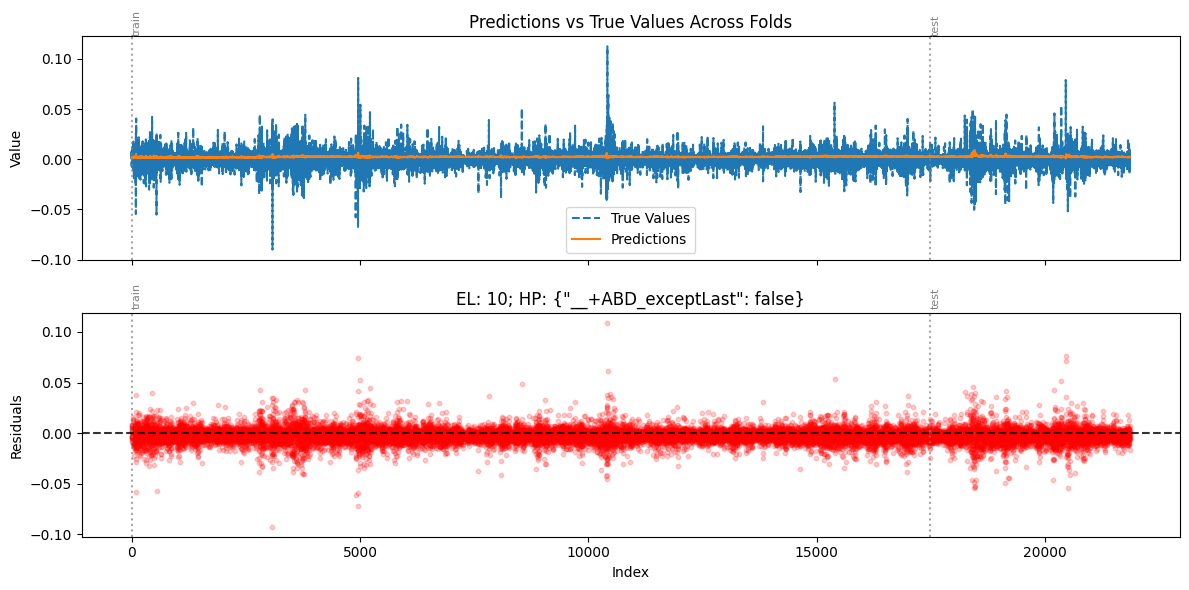

Epoch 1/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0035 - mae: 0.0328
Epoch 2/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.8307e-05 - mae: 0.0059
Epoch 3/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1454e-05 - mae: 0.0056
Epoch 4/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.7126e-05 - mae: 0.0054
Epoch 5/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.8536e-05 - mae: 0.0054
Epoch 6/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.7650e-05 - mae: 0.0054
Epoch 7/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.4452e-05 - mae: 0.0053
Epoch 8/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.3753e-05 - mae: 0.0053
Epoch 9/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.4174e-05 - mae: 0.0052
Epoch 10/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.6633e-05 - mae: 0.0053
Epoch 11/30
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.5362e-05 - mae: 0.0052
Epoch 12/30
 560/1093 ━━━━━━━━━━━━━━━━━━━━ 1s

KeyboardInterrupt: 

In [15]:
import json
importlib.reload(LSTM_returns)

hyperparams_list = [
    {
        '__+ABD_exceptLast': False
    },
    {
        'batch_size': 16
    },
    {
        'layers': [64, 64, 64]
    },
    {
        'LSTM_activation': 'relu'
    },
    {
        'optimizer': 'adam'
    },
    {
        'loss': 'mean_absolute_error'
    },
    {
        'loss': 'huber'
    },
    {
        'dropout': 0
    },
    {
        '__finalAct': 'sigmoid'
    },
    {
        '__penultRelu': True
    }
]

Fbutnt_LSTMs = []
for e_l, train_X_y in zip(episode_lengths, train_X_y_s[0]):
    for hyperparams in hyperparams_list:
        str_hyperparams = json.dumps(hyperparams)

        hyperparams['input_shape'] = train_X_y['train_X'].shape[1:]
        hyperparams['epochs'] = 30
        LSTM = LSTM_returns.create(hyperparams)
        LSTM_returns.train(LSTM, hyperparams, train_X_y, evaluateAtEnd=False)
        plt = LSTM_returns.all_folds_plot(LSTM, train_X_y)
        plt.title(f"EL: {e_l}; HP: {str_hyperparams}")
        plt.show()